<a href="https://colab.research.google.com/github/ruizdiazji/MachineLearningUNS2022/blob/master/ml_clase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ML - Clase 2 - Ejercicio 1-a)

Partiendo del [dataset](https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/casos_covid_bahia.csv), que contiene los casos de covid reportados en la ciudad de Bahía Blanca entre los días 30/06/2020 y 25/09/2020, provisto por la cátedra y que fue obtenido de la [página](https://datos.bahia.gob.ar/dataset) de datos del gobierno de la ciudad de Bahía Blanca. Se realizará un análisis exploratorio sobre el conjunto de datos para determinar si las variables pueden ser consideradas normales y, si algunas de ellas tienen un comportamiento sospechoso.


In [108]:
from __future__ import print_function

import pandas as pd
pd.__version__

from google.colab import data_table
data_table.enable_dataframe_formatter()

url = "https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/casos_covid_bahia.csv"
#como pd.read_html retorna una lista de data frames, y en este caso, el dataset está compuesto de una sola tabla, se toma
#el primer objeto [0], que es la tabla de interes

casos_covid = pd.read_html(url)[0] 

casos_covid.info()
casos_covid.head(len(casos_covid.index))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         0 non-null      float64
 1   fecha                              88 non-null     object 
 2   confirmados                        88 non-null     int64  
 3   activos                            88 non-null     int64  
 4   recuperados                        88 non-null     int64  
 5   decesos                            88 non-null     int64  
 6   descartados                        88 non-null     int64  
 7   sospechosos                        88 non-null     int64  
 8   contencion_psicologica             88 non-null     int64  
 9   monitoreo_epidemiologico           88 non-null     int64  
 10  aislamiento_por_contacto_estrecho  88 non-null     int64  
 11  aprehendidos                       88 non-null     int64  
d

,Unnamed: 0,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,NaN,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,NaN,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,NaN,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,NaN,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,NaN,2020-07-04,154,70,78,6,622,31,356,2377,214,0
...,...,...,...,...,...,...,...,...,...,...,...,...
83,NaN,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0
84,NaN,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0
85,NaN,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0
86,NaN,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0


Luego de cargar el dataset, se puede ver que la tabla está formada por 12 atributos y 88 registros. EL primer atributo de la tabla, cuyo label es "Unnamed" indica el índice de la fila de la tabla (aparentemente generado de forma automática al crear el csv) y, al no ser relevante para el caso de estudio, lo eliminamos de la tabla. El resto de los atributos, a priori, pueden aportar información al caso de estudio.


In [109]:
casos_covid = casos_covid.drop(columns=["Unnamed: 0"])

import datetime
date_list = casos_covid["fecha"]
i=0
for day in date_list:
  current_day = day.split("-")
  d= datetime.date(int(current_day[0]),int(current_day[1]),int(current_day[2])).weekday()
  casos_covid["fecha"].values[i] = d
  i+=1

#el dia = 0 corresponde a Lunes y dia = 6 corresponde a Domingo
#puedo sustituir el atributo fecha, que originalmente estaba en el dataset, por un atributo que represente el día, entre 0 y 6
#de la semana correspondiente

casos_covid.head(len(casos_covid.index))

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,1,106,29,71,6,574,23,342,2338,181,0
1,2,114,31,77,6,581,22,342,2207,172,0
2,3,124,40,78,6,588,24,356,2162,176,0
3,4,137,53,78,6,606,31,356,2353,190,0
4,5,154,70,78,6,622,31,356,2377,214,0
...,...,...,...,...,...,...,...,...,...,...,...
83,0,2589,1319,1209,61,3557,303,417,1261,510,0
84,1,2714,1371,1282,61,3615,292,417,1197,554,0
85,2,2841,1464,1313,64,3658,286,417,1206,562,0
86,3,2906,1474,1366,66,3682,331,417,1221,562,0


Se grafican los histogramas de cada uno de los atributos del dataset (excluyendo el atributo aprehendidos ya que el valor es cero en cada registro de la tabla) para poder hacer una inspección visual de los mismos junto a la estimación de la función de densidad de probabilidad (PDF) y, ver si alguno tiene distribución normal. Además, y en el caso de que no tengan una aparente distribución normal, se grafican los histogramas de los atributos aplicandole el logarítmo y la  estimación de la PDF y se hace una inspección visual de los mismos para determinar si pueden corresponder o no a una distribución log-normal.

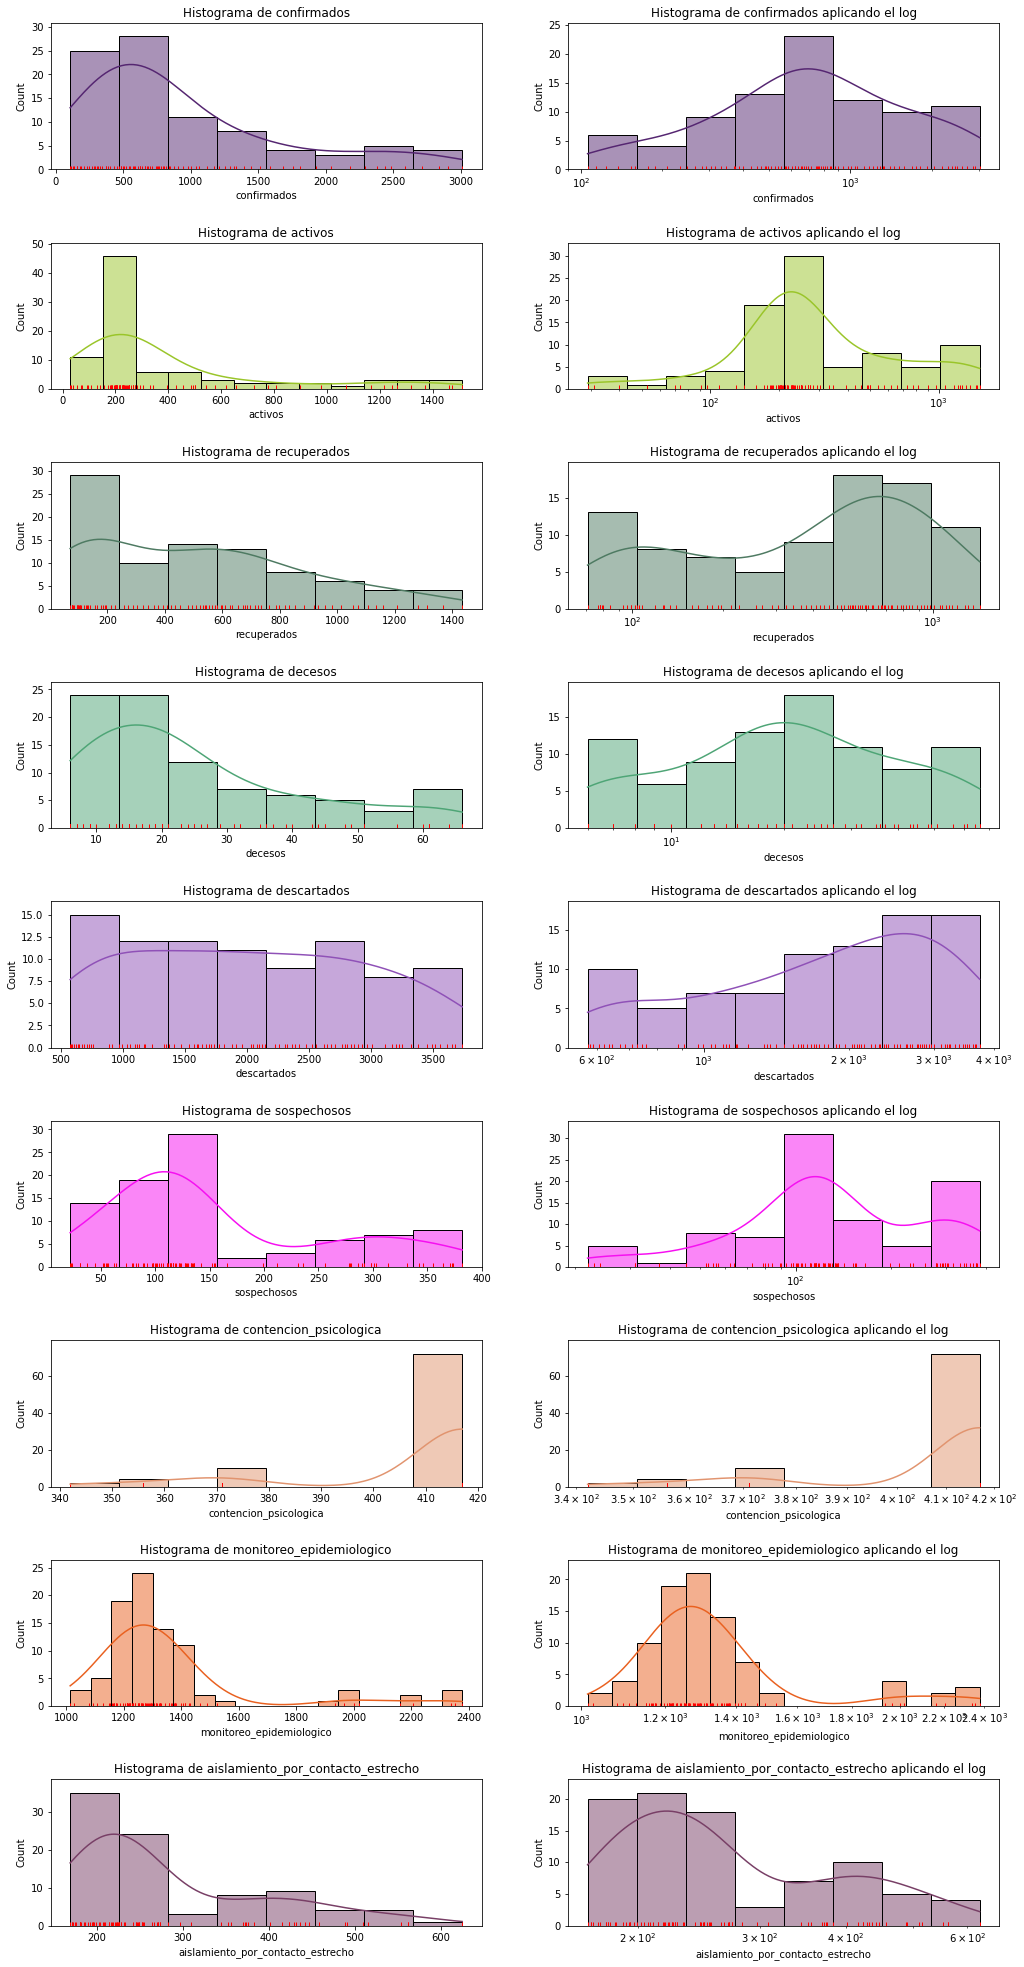

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from random import randint

#sns.histplot(data=casos_covid["confirmados"],kde=True,log_scale=True)

sns.color_palette("flare", as_cmap=True)
rows = 9
columns = 2
f, axes = plt.subplots(rows,columns,figsize=(17,35), sharex=False)
plt.subplots_adjust(hspace = 0.5)
ind = 0
axes = np.ravel(axes, order='F')
colors = []

for i in range(rows):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

for f in casos_covid[casos_covid.columns[1:10]]:
    try:
      sns.histplot(casos_covid[f],ax=axes[ind], kde = True,color=colors[ind])
      sns.rugplot(casos_covid[f], color="red", ax=axes[ind])
      axes[ind].set_title("Histograma de "+f)
    except:
      print("error graficando el histograma ",f)
    ind+=1
for f in casos_covid[casos_covid.columns[1:10]]:
    try:
      ind_color = ind - 9
      sns.histplot(casos_covid[f],ax=axes[ind], kde = True, color=colors[ind_color],log_scale = True)
      sns.rugplot(casos_covid[f], color="red", ax=axes[ind])
      axes[ind].set_title("Histograma de "+f+" aplicando el log")
    except:
      print("error graficando el histograma ", f," aplicandole el log")
    ind+=1

    


Del análisis visual se desprenden las siguientes observaciones;
 <ul>
 <li><u>Confirmados</u>: En el histograma de "<i><b>casos confirmados</i></b>" se puede ver que, si bien la PDF no tiene una distribución normal, hay una mayor cantidad de casos en el rango de 0 a 1000 y estos van decreciendo conforme nos movemos sobre el eje de las abscisas. Al aplicar el logarítmo a cada uno de los registros se puede apreciar en el histograma de "<i><b>casos confirmados aplicando el log</b></i>" que la distribución si se parece a una normal.
 </li><br>
 <li><u>Activos</u>: El histograma de "<i><b>casos activos</b></i>" no se puede decir que la PDF sea normal pero, sin embargo, se puede ver que hay una gran cantidad de casos en torno a 200 y que van disminuyendo conforme nos movemos a la derecha sobre el eje x. Al aplicar el logarítmo a los registros, vemos en el histograma "<i><b>casos activos aplicando el log</b></i> que la distribución se parece a una normal con una cola derecha más densa que la izquierda, esto se debe a que, en el histograma original la mayor densidad de registros se agrupan en un pequeño intervalo a la izquierda del gráfico y, si bien los registros mayores a 500 tienen una baja cantidad, al aplicar el logarítmo, estos cobran un mayor peso en el histograma.
</li><br>
<li><u>Recuperados</u>: Observando el histograma de "<i><b>recuperados</b></i>" se puede ver que la mayor densidad se encuentra en un entorno de los 200 casos y va decreciendo al desplazarse hacia la derecha en el eje de las abscisas en forma exponencial a excepción de la barra que representa la cantidad de casos recuperados mayor a 200 y menor a 400 en la que se ve que la cantidad es menor que las dos sucesivas. Esto se podría considerar como sospechoso o un error en la carga de los registros de recuperados. Al aplicar el logaritmo a  los registros y graficar el histograma de “<i><b>recuperados aplicando el log</b></i>" se ve que la distribución no es normal, esto se debe, al error previamente descripto.
</li><br>
<li><u>Decesos</u>: El histograma de "<i><b>decesos</b></i>" alcanza su mayor densidad en el rango de 15 a 20 y va disminuyendo conforme aumenta el valor del registro. A simple vista, la distribución no se puede considerar normal, sin embargo, aplicando el logaritmo a los registros y analizando el histograma de “<i><b>decesos aplicando el log</b></i>" se puede decir que la distribución se aproxima a una normal bastante “achatada” con una cola derecha más densa que la izquierda debido a que, en la última barra del histograma de decesos hay una cantidad considerablemente mayor respecto a sus próximos en la izquierda.
</li><br>
<li><u>Descartados</u>: Observando el histograma de casos “<i><b>descartados</b></i>” se puede ver que la PDF no es normal, mas bien, se aproxima levemente a una distribución uniforme. En este caso, el histograma de casos “<i><b>descartados aplicando el log</b></i>” no aporta información relevante al análisis.
</li><br>
<li><u>Contención psicológica</u>: En el histograma de casos de “<i><b> contención psicológica</b></i>” se puede ver que sólo existen registros en los rangos de 340 a 365, 370 a 380 y 405 a 415 aproximadamente. A su vez, se observa que la mayor cantidad de registros se sitúa en torno a los 410 y que va aumentando conforme nos desplazamos sobre el eje de las abscisas de izquierda a derecha. Podemos decir, entonces, que la distribución no se parece a una normal y que, al aplicar el logaritmo a los registros y graficar el histograma de casos de “<i><b>contención psicológica aplicando el log</b></i> no obtenemos información adicional o relevante. 
</li><br>
<li><u>Aislamiento por contacto estrecho</u>: Analizando el histograma de casos de “<i><b>aislamiento por contacto estrecho</b></i>” se puede ver que si bien la PDF no parece tener distribución normal, al aplicarle el logaritmo a los registros y grafiar el histograma de casos de “<i><b>aislamiento por contacto estrecho aplicando el log</b></i>” la PDF se aproxima a una distribución normal con una cola derecha más pesada debido a dos factores; entre 400 y 450 casos hay una mayor cantidad de registros que sus barras correlativas en el histograma y, en torno a los 300 casos, la densidad de registros es considerablemente menor que las barras próximas.</li>
</ul>

Para saber si las variables pueden ser normales o no, además de realizar una inspección y analisis visual, se puede utilizar una prueba de hipotesis. Para realizar la prueba de hipotesis, consideraremos son necesarias dos hipotesis antagonicas o complementarias. Supondremos que la hipotesis verdadera es que la variable a probar tiene distribución normal y la llamamos H<sub>0</sub>, mientras que la hipotesis alternativa, que hace referencia a que la variable a probar no tiene distribución normal, la llamaremos H<sub>l</sub>.

Ante este proceso, tenemos cuatro posibles combinaciones según la decisión tomada, estos son;
<img src="https://drive.google.com/uc?id=1a350ZfdvCB2h_Kt3Lp3w5mjMBrydo_zP" alt="gráfico area de rechazo y no rechazo">

El valor &#945; se denomina nivel de significancia y su complemento (1- &#945;) el nivel de confianza. Los valores que están por encima del nivel de significancia, en el eje horizontal, constituyen el area de rechazo de la hipotesis nula.

<img src="https://drive.google.com/uc?id=1NUfs_rrOHIrklh8tfSH4851dotyFQE_8" alt="gráfico tipo de errores">

Un aspecto, aquí importante es el valor de p (P-Value) que es el valor del estadístico de prueba que se aplique. Indica que tan significante son los resultados de la muestra, considerando que la H<sub>0</sub> sea verdadera.

Podemos comparar el valor de p con el nivel de significancia α. Si el valor de p < α, H<sub>0</sub> se rechaza, de otro modo H<sub>0</sub> no se rechaza. Así si;

p = 0.10, tenemos alguna evidencia que H<sub>0</sub> no es verdadera.
p = 0.05, tenemos fuerte evidencia que H<sub>0</sub> no es verdadera.
p = 0.01, tenemos muy fuerte evidencia que H<sub>0</sub> no es verdadera.
p = 0.001, tenemos una extremadamente fuerte evidencia que H<sub>0</sub> no es verdadera.

La biblioteca scipy tiene un apartado de distribuciones estadísticas scipy.stat en la cual hay métodos para trabajar con distribuciones estadísticas continuas y discretas.




In [111]:
from scipy.stats import stats

def test_result(p):
  alpha = [0.001,0.01,0.05,0.1]
  for i in range (len(alpha)):
    if p < alpha[i]:
        return i
  return -1
print("----------")
for f in casos_covid[casos_covid.columns[1:10]]:
  k2, p = stats.normaltest(casos_covid[f])
  isnormal = test_result(p)
  if(isnormal == 0):
    print("Hay extremadamente fuerte evidencia para asegurar que la variable casos "+f+" no es normal")
  elif( isnormal == 1):
    print("Hay muy fuerte evidencia para asegurar que la variable de casos "+f+" no es normal")
  elif(isnormal == 2):
    print("Hay fuerte evidencia para asegurar que la variable de casos "+f+" no es normal")
  elif(isnormal == 3):
    print("Hay alguna evidencia para asegurar que la variable de casos "+f+" no es normal")
  elif (isnormal == -1):
      text = "La variable casos "+f+" se puede considerar normal con un "
      interval = round((1-p)*100,2)
      text+=str(interval)
      text+="% de confianza.\n"
      text+=f"Con media = {casos_covid[f].mean():.3f}"
      text+=f" y desvío estandar = {casos_covid[f].std(ddof=1):.3f}"
      print(text)

  k2, p = stats.normaltest(np.log10(casos_covid[f]))
  isnormal = test_result(p)
  if(isnormal == 0):
    print("Hay extremadamente fuerte evidencia para asegurar que la variable casos "+f+" aplicando el log no es normal")
  elif( isnormal == 1):
    print("Hay muy fuerte evidencia para asegurar que la variable casos "+f+" aplicando el log no es normal")
  elif(isnormal == 2):
    print("Hay fuerte evidencia para asegurar que la variable casos "+f+" aplicando el log no es normal")
  elif(isnormal == 3):
    print("Hay alguna evidencia para asegurar que la variable casos "+f+" aplicando el log no es normal")
  elif(isnormal == -1):
    text = "La variable casos "+f+" aplicando el log se puede considerar normal con un "
    interval = round((1-p)*100,2)
    text+=str(interval)
    text+="% de confianza.\n"
    text+=f"Con media = {casos_covid[f].mean():.3f}"
    text+=f" y desvío estandar = {casos_covid[f].std(ddof=1):.3f}"
    print(text)
  print("----------")
  


----------
Hay extremadamente fuerte evidencia para asegurar que la variable casos confirmados no es normal
La variable casos confirmados aplicando el log se puede considerar normal con un 59.22% de confianza.
Con media = 944.977 y desvío estandar = 741.952
----------
Hay extremadamente fuerte evidencia para asegurar que la variable casos activos no es normal
La variable casos activos aplicando el log se puede considerar normal con un 45.96% de confianza.
Con media = 403.739 y desvío estandar = 377.383
----------
Hay fuerte evidencia para asegurar que la variable de casos recuperados no es normal
Hay extremadamente fuerte evidencia para asegurar que la variable casos recuperados aplicando el log no es normal
----------
Hay muy fuerte evidencia para asegurar que la variable de casos decesos no es normal
Hay fuerte evidencia para asegurar que la variable casos decesos aplicando el log no es normal
----------
Hay extremadamente fuerte evidencia para asegurar que la variable casos descarta

Una vez realizado el test para comprobar si las variables se pueden considerar como nornales o no, podemos concluir que;
<ul>
<li>Ningún atributo se lo puede considerar con distribución normal. Sin embargo, no sucede lo mismo para el caso de las variables en escala logarítmica.
</li>
<li>Para los atributos; casos confirmados, casos activos y casos sospechosos no se puede descartar la posibilidad de que tengan distribución log-normal. Aunque es importante destacar que, el intervalo de confianza en todos estos casos no es muy elevado (entre el 45 y 67%), lo cual hace suponer que la probabilidad de que se obtenga un registro tan extremo como los observados es de, para los casos sospechosos un 33%, para los casos activos 44% y para los casos confirmados 40%.
</li>
</ul>

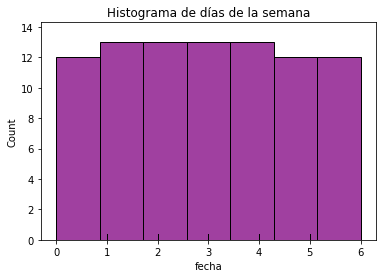

In [112]:
try:
  g=sns.histplot(casos_covid["fecha"],color="purple",bins=7)
  g=sns.rugplot(casos_covid["fecha"], color="black")
  g.set_title("Histograma de días de la semana")
except:
  print("error graficando el histograma")

La variable fecha de la base de datos, si bien pareciera no aportar información relevante, si se considera tomando los días de la semana correspondientes a la fecha, donde 0 equivale al Lunes y 6 al Domingo se puede graficar el correspondiente histograma (se puede observar en la celda superior a esta).
Analizando visualmente este histograma podemos ver que la cantidad de días de la semana que conforman el dataset está bastante equilibrada, es decir, para los días; Lunes, Sabado y Domingo hay 12 registros y, para el Martes,Miercoles,Jueves y Viernes hay 13. Esta información, además de asegurar de que no hay un sesgo respecto a si algunos días se reportaron datos y otros no, se podría utilizar para hacer una inspección visual de, por ejemplo, histogramas bivariados donde se tenga el día de la semana y la cantidad de casos confirmados, de este modo, tal vez, se podría encontrar una explicación a los casos que resultan con comportamiento sospechoso como la contención psicológica, el monitoreo epidemiológico y los casos de sospechosos y recuperados discutidos anteriormente.

#ML - Clase 2 - Ejercicio 1-b)
Tomando el [dataset](https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/camas_covid_bahia.csv), que contiene datos asociados a la ocupación de camas por covid,  provisto por la cátedra y que fue obtenido de la [página](https://datos.bahia.gob.ar/dataset) de datos del gobierno de la ciudad de Bahía Blanca. Se realizará un análisis exploratorio sobre el conjunto de datos para determinar si las variables pueden ser consideradas normales y, si algunas de ellas tienen un comportamiento sospechoso.

In [113]:
url2 = "https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/camas_covid_bahia.csv"
#como pd.read_html retorna una lista de data frames, y en este caso, el dataset está compuesto de una sola tabla, se toma
#el primer objeto [0], que es la tabla de interes

camas_covid = pd.read_html(url2)[0] 

camas_covid.info()
camas_covid.head(len(camas_covid.index))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             0 non-null      float64
 1   informeNumero                          88 non-null     int64  
 2   fecha                                  88 non-null     object 
 3   total_camas_hospitales                 88 non-null     int64  
 4   camas_ocupadas_hospitales              88 non-null     int64  
 5   porcentaje_ocupacion_camas_hospitales  88 non-null     int64  
 6   camas_covid                            88 non-null     int64  
 7   camas_sospechosos_covid                88 non-null     int64  
 8   camas_confirmados_covid                88 non-null     int64  
 9   porcentaje_ocupacion_camas_covid       88 non-null     int64  
 10  uti_covid_totales                      88 non-null     int64  
 11  uti_covi

,Unnamed: 0,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,NaN,131,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,NaN,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN
2,NaN,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
3,NaN,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
4,NaN,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,NaN,10,2020-07-04,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3,NaN
84,NaN,9,2020-07-03,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3,NaN
85,NaN,8,2020-07-02,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3,NaN
86,NaN,7,2020-07-01,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3,NaN


El dataset de camas covid está compuesto por 88 registros y 20 variables, de las cuales Unnamed: 0 y observaciones se descartan al momento de hacer un análisis visual del comportamiento de las variables ya que, la primera no tiene datos en ninguno de sus registros y la segunda (observaciones) son datos que no se pueden considerar como una variable continua o categórica. Además, al igual que en el caso anterior, la variable "fecha" se convierte a días de la semana

In [114]:
camas_covid = camas_covid.drop(columns=["Unnamed: 0"])

import datetime
date_list = camas_covid["fecha"]
i=0
for day in date_list:
  current_day = day.split("-")
  d= datetime.date(int(current_day[0]),int(current_day[1]),int(current_day[2])).weekday()
  camas_covid["fecha"].values[i] = d
  i+=1
camas_covid.info()
camas_covid.head(len(camas_covid.index))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   informeNumero                          88 non-null     int64 
 1   fecha                                  88 non-null     object
 2   total_camas_hospitales                 88 non-null     int64 
 3   camas_ocupadas_hospitales              88 non-null     int64 
 4   porcentaje_ocupacion_camas_hospitales  88 non-null     int64 
 5   camas_covid                            88 non-null     int64 
 6   camas_sospechosos_covid                88 non-null     int64 
 7   camas_confirmados_covid                88 non-null     int64 
 8   porcentaje_ocupacion_camas_covid       88 non-null     int64 
 9   uti_covid_totales                      88 non-null     int64 
 10  uti_covid_ocupadas                     88 non-null     int64 
 11  respiradores_totales 

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,131,4,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,130,3,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN
2,129,2,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
3,128,1,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
4,127,0,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,10,5,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3,NaN
84,9,4,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3,NaN
85,8,3,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3,NaN
86,7,2,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3,NaN


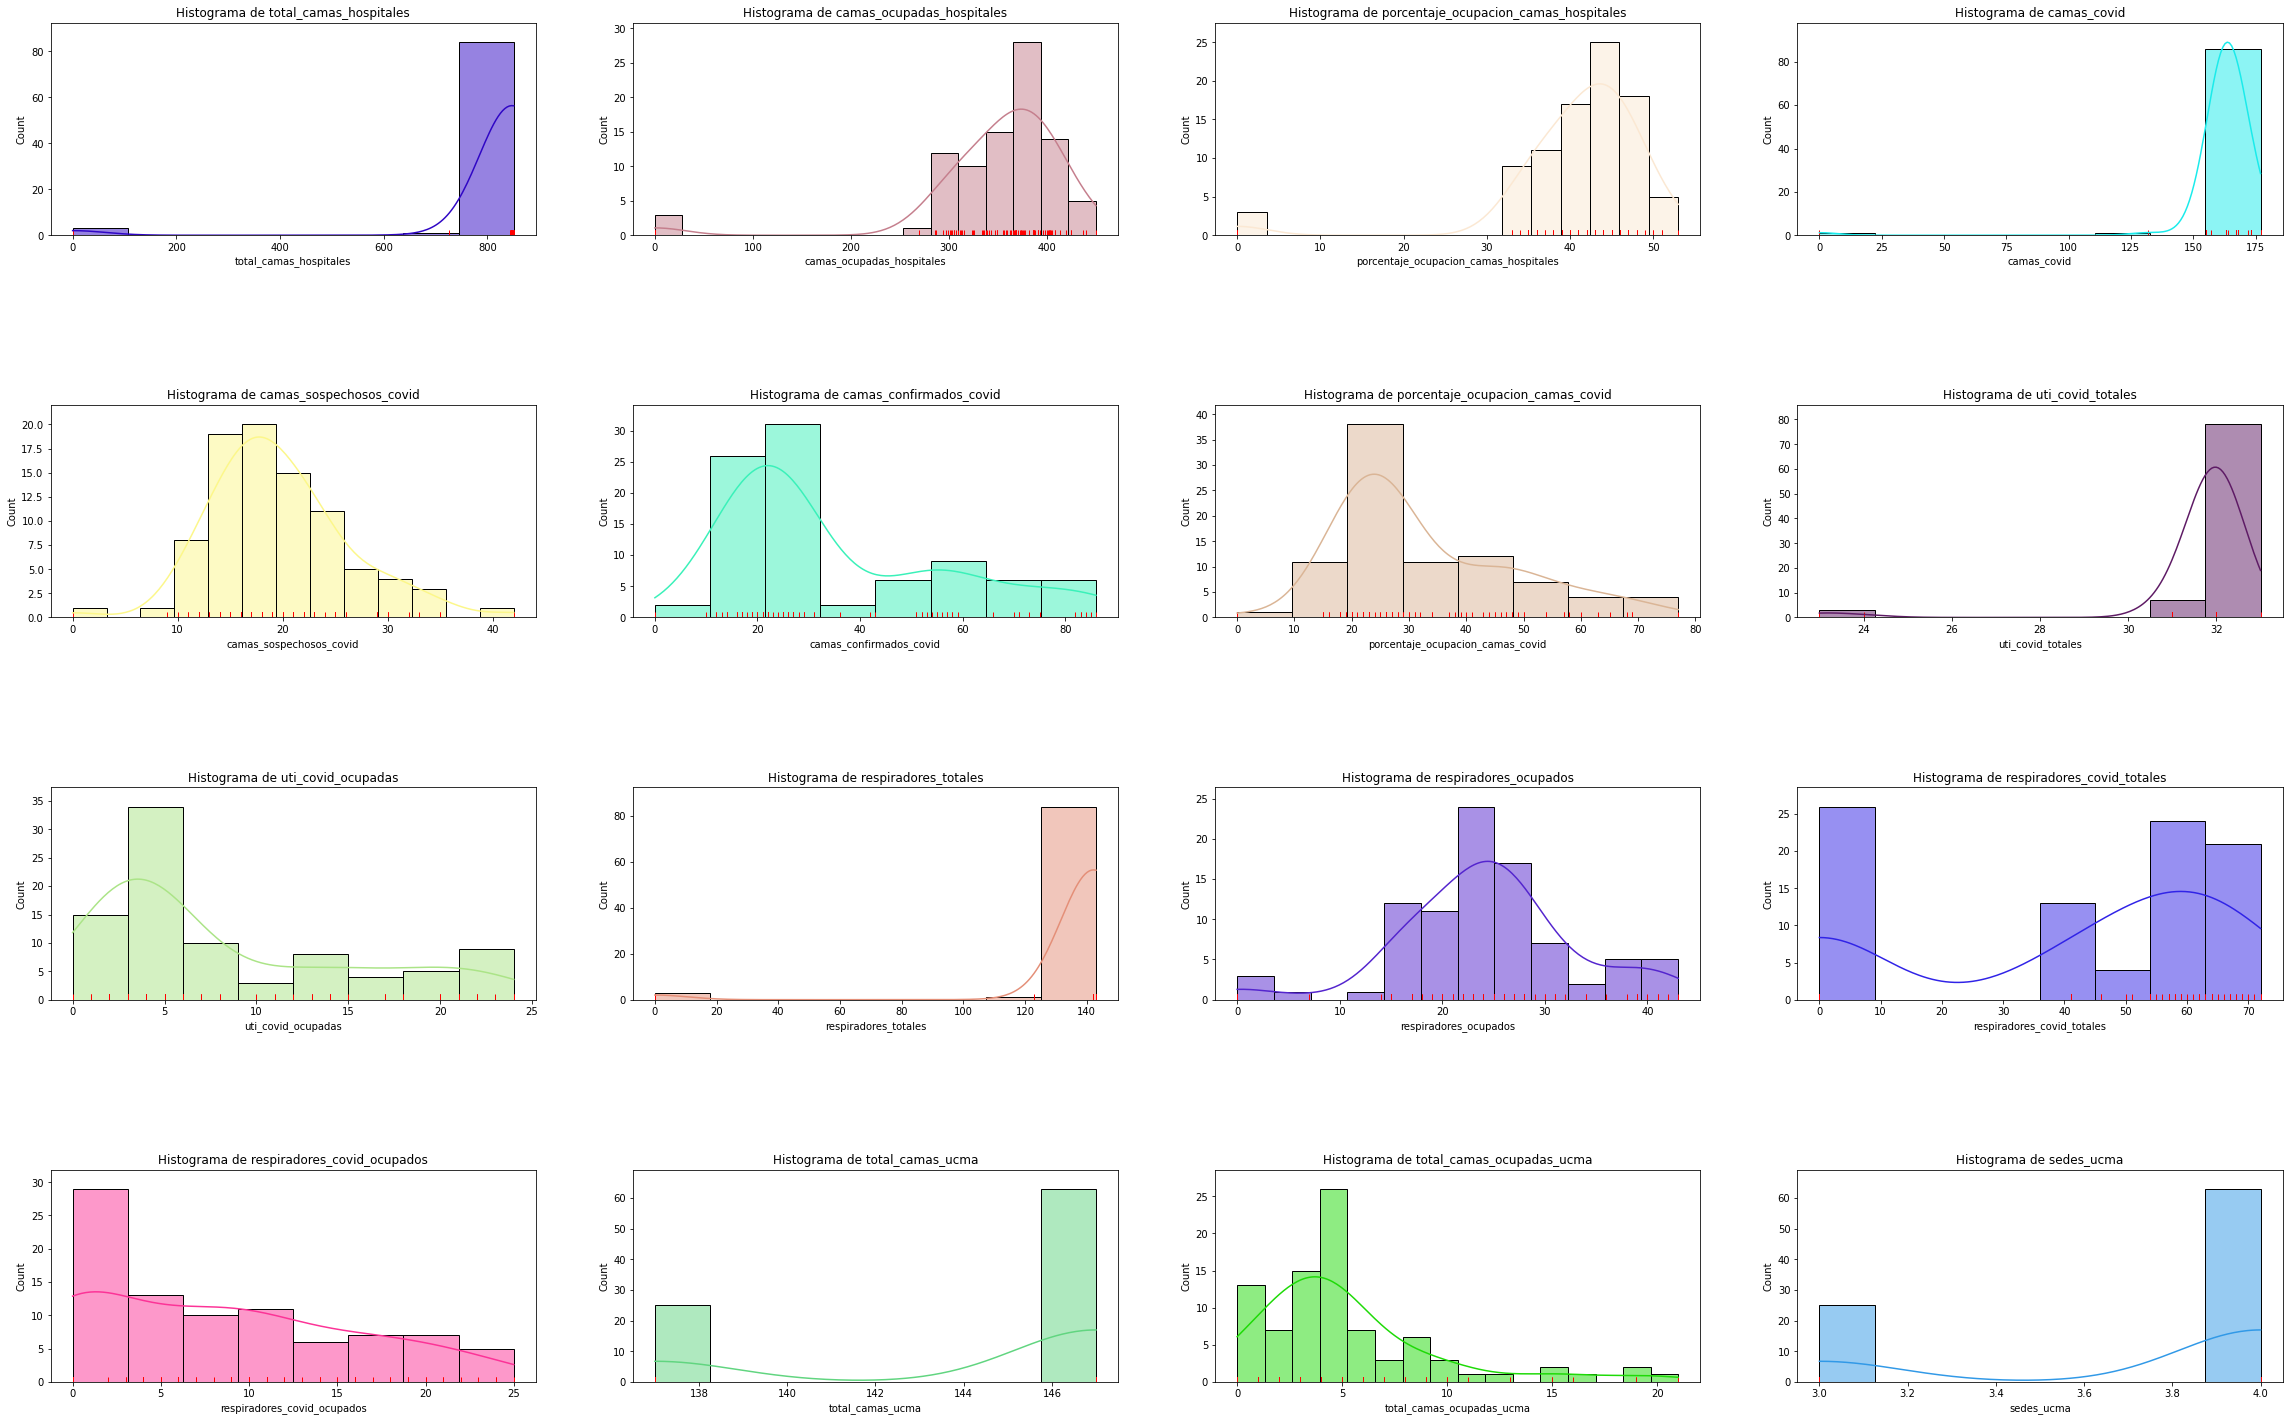

In [115]:
sns.color_palette("flare", as_cmap=True)
rows = 4
columns = 4
f, axes = plt.subplots(rows,columns,figsize=(40,25), sharex=False)
plt.subplots_adjust(hspace = 0.8)
ind = 0
axes = axes.ravel()
colors = []

for i in range(rows*columns):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

for f in camas_covid[camas_covid.columns[2:18]]:
    try:
      sns.histplot(camas_covid[f],ax=axes[ind], kde = True,color=colors[ind])
      sns.rugplot(camas_covid[f], color="red", ax=axes[ind])
      axes[ind].set_title("Histograma de "+f)
    except:
      print("error graficando el histograma ",f)
    ind+=1
# for f in camas_covid[camas_covid.columns[2:18]]:
#     try:
#       ind_color = ind - 9
#       sns.histplot(camas_covid[f],ax=axes[ind], kde = True, color=colors[ind_color],log_scale = True)
#       sns.rugplot(camas_covid[f], color="red", ax=axes[ind])
#       axes[ind].set_title("Histograma de "+f+" aplicando el log")
#     except:
#       print("error graficando el histograma ", f," aplicandole el log")
#     ind+=1

En el dataset hay algunos reistros que tienen valor 0 en sus respectivas variables y, debido al campo de observaciones donde se aclara que en esos casos faltó información por parte de algún hospital, resulta conveniente, en principio, quitarlos de la tabla, asumiendo que al ser una tabla mas alta que ancha, no van a generar un perjucio al momento de hacer el análisis estadístico paramétrico.

In [116]:
from numpy.ma.core import empty
camas_covid = camas_covid[camas_covid["observaciones"].isnull()]
camas_covid.info()
camas_covid.head(25)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 87
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   informeNumero                          80 non-null     int64 
 1   fecha                                  80 non-null     object
 2   total_camas_hospitales                 80 non-null     int64 
 3   camas_ocupadas_hospitales              80 non-null     int64 
 4   porcentaje_ocupacion_camas_hospitales  80 non-null     int64 
 5   camas_covid                            80 non-null     int64 
 6   camas_sospechosos_covid                80 non-null     int64 
 7   camas_confirmados_covid                80 non-null     int64 
 8   porcentaje_ocupacion_camas_covid       80 non-null     int64 
 9   uti_covid_totales                      80 non-null     int64 
 10  uti_covid_ocupadas                     80 non-null     int64 
 11  respiradores_totales 

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,131,4,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,130,3,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN
2,129,2,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
3,128,1,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
4,127,0,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN
5,126,6,848,368,43,163,29,75,63,33,23,142,36,70,22,147,16,4,NaN
6,125,5,848,373,43,163,15,83,60,32,20,142,34,68,20,147,15,4,NaN
8,123,3,848,424,50,163,25,71,58,32,21,142,39,67,19,147,7,4,NaN
9,122,2,848,419,49,163,18,71,54,32,17,142,41,67,19,147,9,4,NaN
10,121,1,848,388,45,163,20,73,57,32,20,142,38,68,20,147,9,4,NaN


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


error graficando el histograma  respiradores_covid_totales  aplicandole el log
error graficando el histograma  respiradores_covid_ocupados  aplicandole el log
error graficando el histograma  total_camas_ocupadas_ucma  aplicandole el log


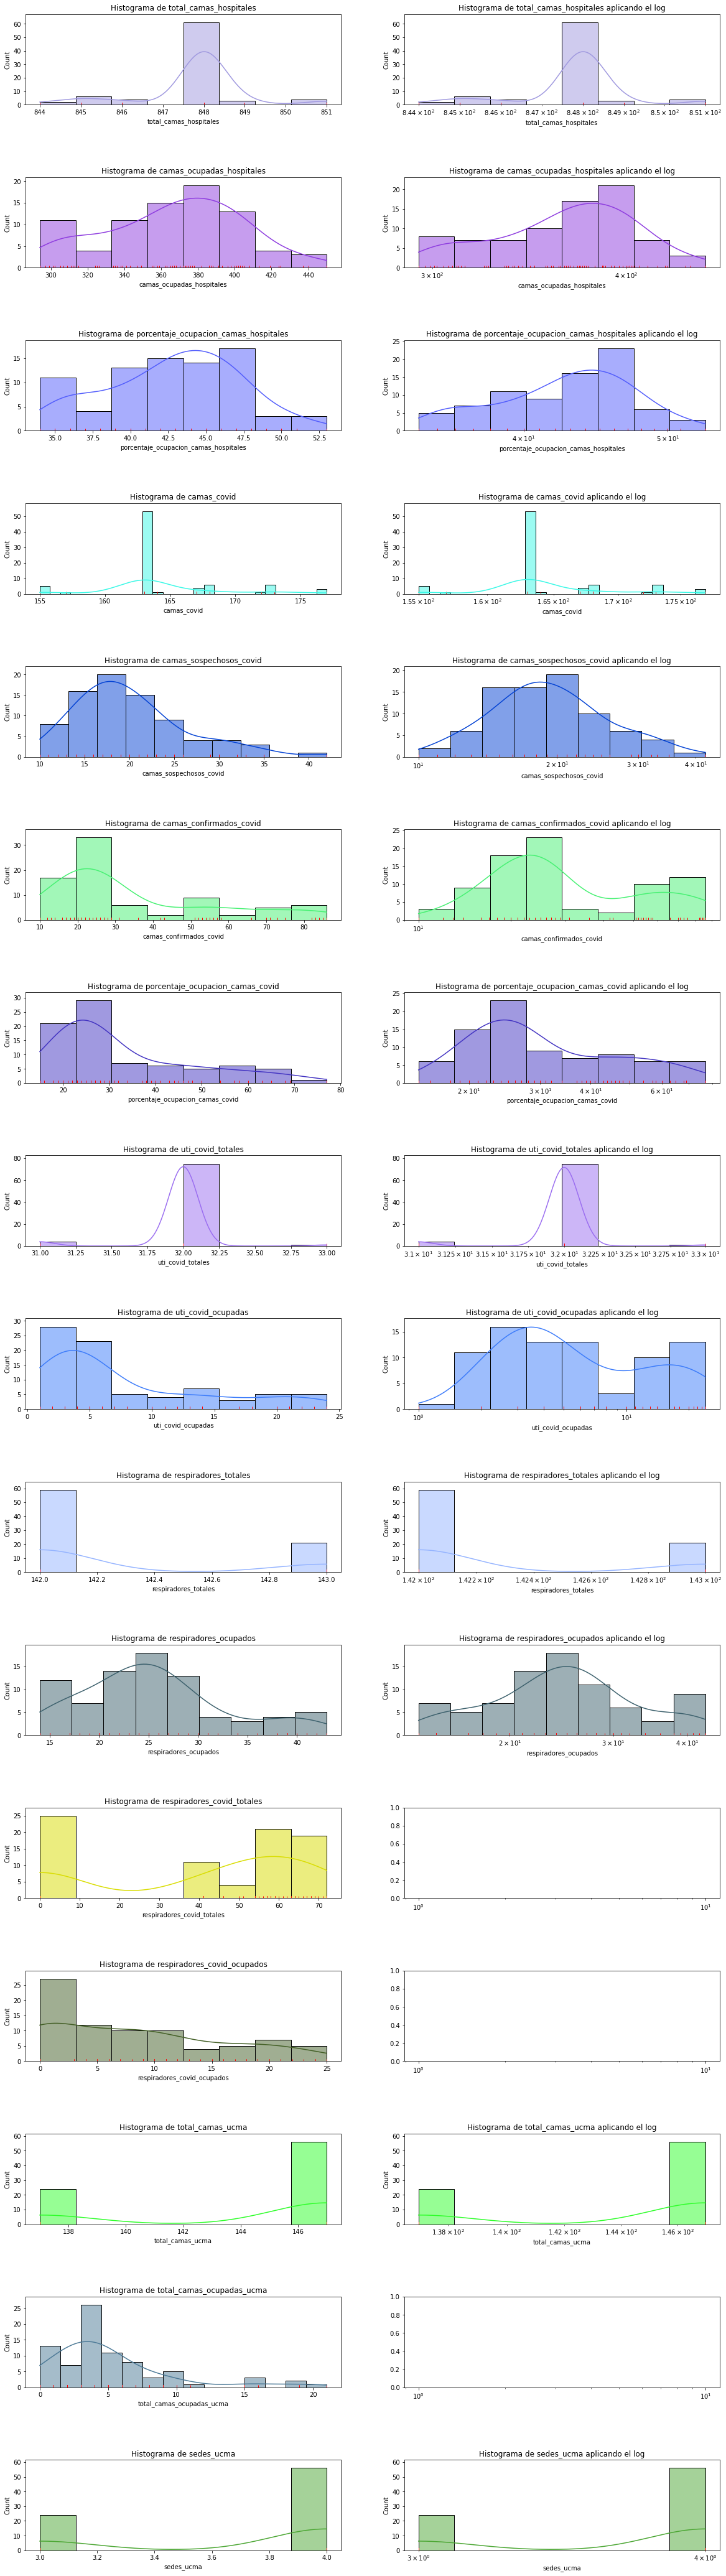

In [117]:
sns.color_palette("flare", as_cmap=True)
rows = 16
columns = 2
f, axes = plt.subplots(rows,columns,figsize=(20,75), sharex=False)
plt.subplots_adjust(hspace = 0.8)
ind = 0
axes = np.ravel(axes, order='F')
colors = []

for i in range(rows):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

for f in camas_covid[camas_covid.columns[2:18]]:
    try:
      sns.histplot(camas_covid[f],ax=axes[ind], kde = True,color=colors[ind])
      sns.rugplot(camas_covid[f], color="red", ax=axes[ind])
      axes[ind].set_title("Histograma de "+f)
    except:
      print("error graficando el histograma ",f)
    ind+=1
for f in camas_covid[camas_covid.columns[2:18]]:
    try:
      ind_color = ind - rows
      sns.histplot(camas_covid[f],ax=axes[ind], kde = True, color=colors[ind_color],log_scale = True)
      sns.rugplot(camas_covid[f], color="red", ax=axes[ind])
      axes[ind].set_title("Histograma de "+f+" aplicando el log")
    except:
      print("error graficando el histograma ", f," aplicandole el log")
    ind+=1

In [118]:
def test_result(p):
  alpha = [0.001,0.01,0.05,0.1]
  for i in range (len(alpha)):
    if p < alpha[i]:
        return i
  return -1
print("----------")
for f in camas_covid[camas_covid.columns[2:18]]:
  try:
    k2, p = stats.normaltest(camas_covid[f])
    isnormal = test_result(p)
    if(isnormal == 0):
      print("Hay extremadamente fuerte evidencia para asegurar que la variable casos "+f+" no es normal")
    elif( isnormal == 1):
      print("Hay muy fuerte evidencia para asegurar que la variable de casos "+f+" no es normal")
    elif(isnormal == 2):
      print("Hay fuerte evidencia para asegurar que la variable de casos "+f+" no es normal")
    elif(isnormal == 3):
      print("Hay alguna evidencia para asegurar que la variable de casos "+f+" no es normal")
    elif (isnormal == -1):
      text = "La variable casos "+f+" se puede considerar normal con un "
      interval = round((1-p)*100,2)
      text+=str(interval)
      text+="% de confianza.\n"
      text+=f"Con media = {camas_covid[f].mean():.3f}"
      text+=f" y desvío estandar = {camas_covid[f].std(ddof=1):.3f}"
      print(text)
  except:
    pass
  try:
    k2, p = stats.normaltest(np.log10(camas_covid[f]))
    isnormal = test_result(p)
    if(isnormal == 0):
      print("Hay extremadamente fuerte evidencia para asegurar que la variable casos "+f+" aplicando el log no es normal")
    elif( isnormal == 1):
      print("Hay muy fuerte evidencia para asegurar que la variable casos "+f+" aplicando el log no es normal")
    elif(isnormal == 2):
      print("Hay fuerte evidencia para asegurar que la variable casos "+f+" aplicando el log no es normal")
    elif(isnormal == 3):
      print("Hay alguna evidencia para asegurar que la variable casos "+f+" aplicando el log no es normal")
    elif(isnormal == -1):
      text = "La variable casos "+f+" aplicando el log se puede considerar normal con un "
      interval = round((1-p)*100,2)
      text+=str(interval)
      text+="% de confianza.\n"
      text+=f"Con media = {camas_covid[f].mean():.3f}"
      text+=f" y desvío estandar = {camas_covid[f].std(ddof=1):.3f}"
      print(text)
  except:
    pass
  print("----------")

----------
Hay muy fuerte evidencia para asegurar que la variable de casos total_camas_hospitales no es normal
Hay extremadamente fuerte evidencia para asegurar que la variable casos total_camas_hospitales aplicando el log no es normal
----------
La variable casos camas_ocupadas_hospitales se puede considerar normal con un 65.89% de confianza.
Con media = 367.050 y desvío estandar = 37.164
La variable casos camas_ocupadas_hospitales aplicando el log se puede considerar normal con un 84.07% de confianza.
Con media = 367.050 y desvío estandar = 37.164
----------
La variable casos porcentaje_ocupacion_camas_hospitales se puede considerar normal con un 61.54% de confianza.
Con media = 42.850 y desvío estandar = 4.392
La variable casos porcentaje_ocupacion_camas_hospitales aplicando el log se puede considerar normal con un 82.35% de confianza.
Con media = 42.850 y desvío estandar = 4.392
----------
Hay muy fuerte evidencia para asegurar que la variable de casos camas_covid no es normal
Hay 

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1010: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)


Del análisis visual y la prueba de distribución normal se puede concluir que;
<ul>
<li> Analizando las variables camas ocupadas_hospitales, porcentaje_ocupacion_camas_hospitales se puede decir que no hay evidencia para rechazar el echo de que tengan una distribución normal
</li>
<li>La variable camas_ocupadas_hospitales si se analiza aplicandole el log en base 10 se puede observar que, el intervalo de confianza al momento de considerarla normal aumenta casi un 20% respecto de la variable sin aplicarle el logaritmo. Lomismo sucede con porcentaje_ocupacion_camas_hospitales.
</li>
<li>La variable casos_respiradores_ocupados aplicandole el logaritmo se puede ver que no hay evidencia para descartar que sea normal, sin embargo, el intervalo de confianza es muy bajo.
</li>
</ul>

#Ejercicio 2
Generar un dataset similar al de la página 12 del apunte de la materia (pdf de la clase 2) formado por dos conjuntos Gaussianos con diferentes media y desvío estándar, N=50 cada uno, uno con etiqueta A y otro con etiqueta B.

Utilizar la curva ROC para proponer un umbral para un clasificador por mínimo error. Evaluar algunos de los parámetros de calidad (exactitud, precisión, f-measure).

Recalcular para algunas variantes(por ejemplo, acercando las medias de los grupos A y B, cambiando el valor umbral, etc.).

¿Cómo podrían hacer no supervisado este proceso?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       50 non-null     float64
 1   b       50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


<Figure size 432x288 with 0 Axes>

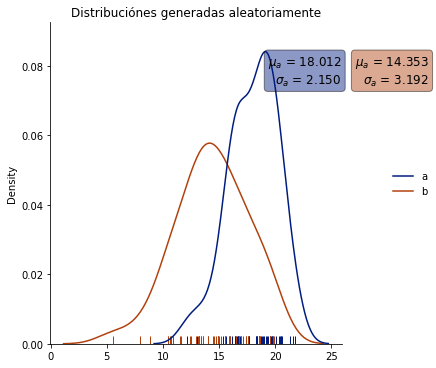

In [119]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import data_table
data_table.enable_dataframe_formatter()

def generate_data_var(N, mean=None, std=None, mean_range=[10,15], std_range=[0,5]):
  if mean is not None:
    if std is not None:
      return np.random.normal(loc=mean, scale=std, size=(N,))
    else:
      std = np.random.uniform(std_range[0],std_range[1])
      return np.random.normal(loc=mean, scale=std, size=(N,))
  else:
    mean = np.random.uniform(mean_range[0],mean_range[1])
    if std is not None:
      return np.random.normal(loc=mean, scale=std, size=(N,))
    else:
      std = np.random.uniform(std_range[0],std_range[1])
      return np.random.normal(loc=mean, scale=std, size=(N,))

def print_displot_dataset(df):
    sns.set_palette("dark",8)
    fig = plt.figure()
    fg = sns.displot(df, kind="kde", rug=True)
    ax = fg.ax
    ax.set_title("Distribuciónes generadas aleatoriamente")

    ind=0
    for dist in df[df.columns]:
      color = sns.color_palette()[ind]
      text = f"$\\mu_a$ = {df[dist].mean():.3f}\n"
      text+= f"$\\sigma_a$ = {df[dist].std(ddof=1):.3f}"
      bbox = dict(boxstyle='round', fc=color, alpha=0.45)
      ax.text(1+(ind * 0.3), 0.9, text, fontsize=12, bbox=bbox,
            transform=ax.transAxes, ha='right', va='top')
      ind+=1

    fig.axes.append(ax)
    fig.show()

df = pd.DataFrame(dict(a=generate_data_var(50, mean=18,std=2),
                       b=generate_data_var(50,mean=14,std=3)),
                  columns=['a', 'b'])
df.info()
df.head(25)
print_displot_dataset(df)



Para computar la curva ROC, y siguiendo el ejemplo de la página 12 del pdf de la clase 2, donde se proponía como ejemplo clasificar entre "naranjas" y "mandarinas", podemos pensar a la clase "a" como naranjas y a la clase "b" como mandarinas. Tomando como objetivo clasificar si un registro es una "naranja", tendremos el dataset compuesto por registros "verdadero" cuando corresponde a la clase "a" y "falso" cuando corresponde a la clase "b". Además, a los fines prácticos de construir la curva ROC, ordenamos en forma decreciente el dataset generado aleatoriamente.

In [120]:
def get_df_roc(df):
  ind = 0
  n_cols = len(df.columns)
  values = [[],[]]
  labels = [[],[]]
  for var in df[df.columns]:
    values[ind]=df[var]
    labels[ind]=np.full(50, var)
    ind+=1

  clasificacion = np.append(labels[0], labels[1])
  valor = np.append(values[0], values[1])

  df_copy = pd.DataFrame({'valor':valor,'clasificacion': clasificacion})
  df_copy_sort = df_copy.sort_values(by=['valor'], ascending=False)
  return df_copy_sort

df_for_roc = get_df_roc(df)
df_for_roc.head(100)

,valor,clasificacion
14,21.768530,a
36,21.548239,a
33,21.285079,a
3,20.565911,a
18,20.489418,a
...,...,...
77,10.441897,b
93,10.411977,b
50,8.882360,b
69,7.943643,b


Para fabricar la curva ROC vamos a utilizar un gráfico cartesiano y llamar al eje de las abscisas como FPR (false positive rate) y dividirlo en V intervalos iguales, donde V corresponde a la cantidad de registros verdaderos "a". Al eje de las ordenadas lo llamamos TPR (true positive rate) y lo dividimos en F intervalos iguales, donde F corresponde a la cantidad de registros falsos "b". Comenzando desde arriba de la tabla (primer registro de la tabla ordenada por valor, ya que la tabla está ordenada de forma decreciente) y desde el origen de coordenadas (FPR=0,TPR=0) desplazamos una celda hacia arriba por cada verdadero y una celda hacia la derecha por cada falso.

Para hallar el valor umbral que nos permite clasificar con mínimo error, y considerando que la recta en color rojo corresponde a un clasificador aleatorio, debemos encontrar el punto donde la recta desplazada verticalmente y la curva ROC se intersectan y que se encuentra más próximo al FPR=0,TPR=1.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


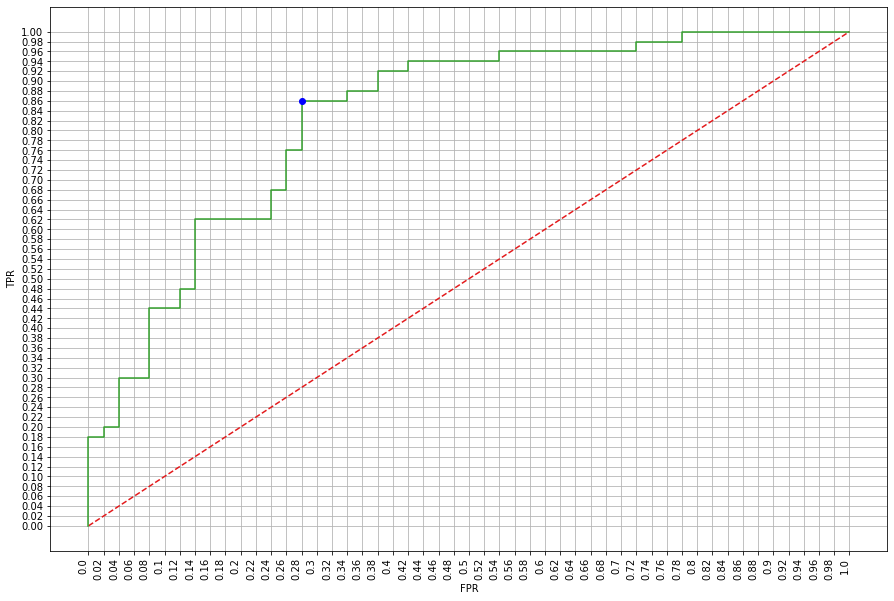

In [121]:
def get_points_roc(df_roc):
  x_points = []
  y_points = []
  x_aux, y_aux = 0,0
  #agregamos el valor de inicio de la curva ROC (0,0)
  x_points.append(0)
  y_points.append(0)
  count_v = 0
  count_f = 0

  for label in df_roc[df_roc.columns[1]]:
    if label == "a":
      y_aux+=1
      count_v+=1
    elif label == 'b':
      x_aux+=1
      count_f+=1
    y_points.append(y_aux)
    x_points.append(x_aux)

  x_points = np.array(x_points)/count_v
  y_points = np.array(y_points)/count_f
  x_points = x_points[::-1]
  y_points = y_points[::-1]

  min = np.inf
  ind = 0
  min_point = (0,0)
  for i in range(x_points.shape[0]):
    current_point = (x_points[i],y_points[i])
    dist = np.sqrt(current_point[0]**2 + (current_point[1]-1)**2)
    if dist<min:
      min = dist
      ind = i
      min_point = current_point

  reg = df_for_roc["valor"].values
  threshold = (reg[ind] + reg[ind-1])/2
  return x_points,y_points,min_point,threshold

def plot_roc(x_points,y_points, min_point=None):
  sns.set_palette("Paired")
  
  fig = plt.figure(figsize=[15,10])
  plt.grid(color='0.7')
  ax = fig.add_subplot(111)
  ax.plot([0,1],color=sns.color_palette()[5], linestyle='--')
  ax.plot(x_points, y_points, color=sns.color_palette()[3], label=f'Curva ROC para clasificar a y b')
  ax.set_yticks(np.arange(0, 1.02, 0.02))
  ax.set_xticks(np.arange(0, 1.02, 0.02))
  ax.set_xticklabels(np.arange(0, 1.02, 0.02).round(decimals=2), rotation=90, ha="right")
  ax.set_xlabel('FPR')
  ax.set_ylabel('TPR')

  if(min_point != None and len(min_point)==2):
    plt.plot(min_point[0], min_point[1], '-o', color = 'blue')

  fig.show()
    
x_roc,y_roc,min_point,threshold = get_points_roc(df_for_roc)
plot_roc(x_roc,y_roc,min_point)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


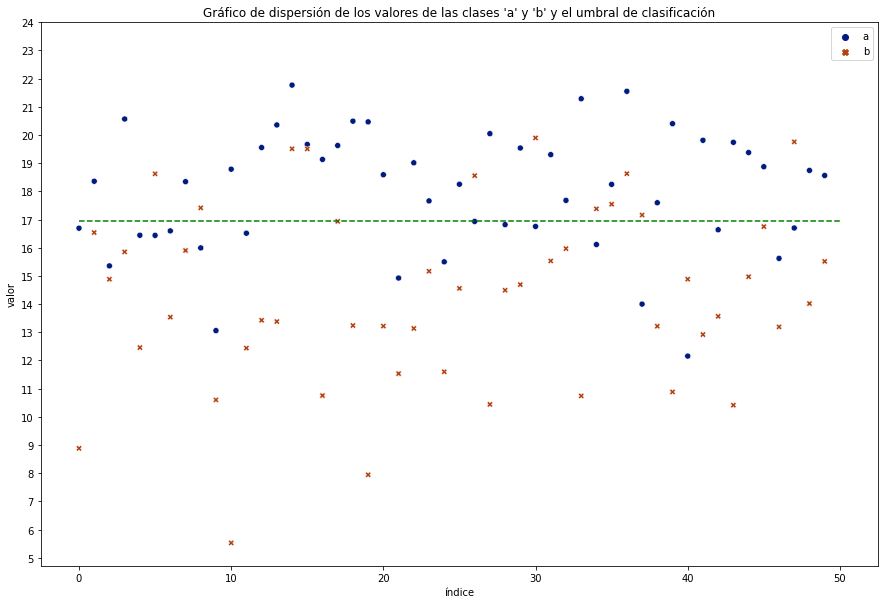

In [122]:
def plot_scatt_thresh(df,threshold, min_y, max_y):
  sns.set_palette("dark",8)

  fig = plt.figure(figsize=[15,10])
  plt.plot((0,50),(threshold,threshold),color="g", linestyle='--')
  ax = fig.add_subplot(111)
  ax = sns.scatterplot(data=df)
  plt.xlabel("índice")
  plt.ylabel("valor")
  ax.set_yticks(np.arange(min_y, max_y))
  plt.title("Gráfico de dispersión de los valores de las clases 'a' y 'b' y el umbral de clasificación")
  plt.show()

plot_scatt_thresh(df,threshold,5,25)

Para calcular métricas asociadas a la calidad del clasificador (f-measure, indice de precisión,exactitud, índice de Jaccard) obtenido utilizando la curva ROC, en principio, es necesario predecir a qué clase corresponde cada registro del dataset, según el umbral previamente obtenido.

In [123]:
def pred_class(df,threshold):
  pred = []
  for reg in df[df.columns[0]]:
    if reg > threshold:
      pred.append("a")
    else:
      pred.append("b")
  return pred
  
df_for_roc_1 = df_for_roc
df_for_roc_1["prediccion"] = pred_class(df_for_roc_1,threshold)

df_for_roc_1.head(100)

,valor,clasificacion,prediccion
14,21.768530,a,a
36,21.548239,a,a
33,21.285079,a,a
3,20.565911,a,a
18,20.489418,a,a
...,...,...,...
77,10.441897,b,b
93,10.411977,b,b
50,8.882360,b,b
69,7.943643,b,b


La precisión del modelo se puede calcular computando la divison de la suma de los verdaderos positivos (TP) con los verdaderos negativos (TN) sobre el total de registros. Es decir;
$precision=\frac{TP+TN}{\sum{poblaciontotal}}$

In [124]:
def get_model_params(df):
  tp = 0
  fp = 0
  tn = 0
  fn = 0
  for clas,pred in zip(df[df.columns[1]],df[df.columns[2]]):
    if clas == pred:
      if clas == "a":
        tp+=1
      else:
        tn+=1
    elif clas != pred:
      if clas == "a":
        fn+=1
      else:
        fp+=1
  return tp,fp,tn,fn

def get_accuracy(model_params):
  return (model_params[0]+model_params[2])/(model_params[0]+model_params[1]+model_params[2]+model_params[3])

def get_precision(model_params):
  return (model_params[0]/(model_params[0]+model_params[1]))

def get_sensitivity(model_params):
  return (model_params[0]/(model_params[0]+model_params[3]))

def get_f_measure(model_params):
  precision = get_precision(model_params)
  sensitivity = get_sensitivity(model_params)
  return (2*precision*sensitivity)/(precision+sensitivity)

def get_specificity(model_params):
  fpr = model_params[1] /(model_params[1]+model_params[2])
  return (1 - fpr)

def get_jaccard(model_params):
  return(model_params[0]/(model_params[0]+model_params[1]+model_params[3]))

def print_model_params(model_params):
  print("-----------------------------------------------------------------")
  print("TP:",model_params[0],"\tFP:",model_params[1],"\tTN:",model_params[2],"\tFN:",model_params[3])
  print("threshold:",round(threshold,3))
  print("accuracy:", round(get_accuracy(model_params),3))
  print("precision:",round(get_precision(model_params),3))
  print("sensitivity:",round(get_sensitivity(model_params),3))
  print("specificity:",round(get_specificity(model_params),3))
  print("f_measure:",round(get_f_measure(model_params),3))
  print("indice Jaccard:",round(get_jaccard(model_params),3))
  print("-----------------------------------------------------------------")

model_params = get_model_params(df_for_roc_1)
print_model_params(model_params)

-----------------------------------------------------------------
TP: 31 	FP: 12 	TN: 38 	FN: 19
threshold: 16.933
accuracy: 0.69
precision: 0.721
sensitivity: 0.62
specificity: 0.76
f_measure: 0.667
indice Jaccard: 0.5
-----------------------------------------------------------------


Cambiando el valor umbral, podemos obtener el siguiente clasificador

In [125]:
def calc_model(df,threshold):
  df_for_roc_copy = df
  #x_roc,y_roc,min_point,threshold = get_points_roc(df_for_roc_copy)
  #plot_scatt_thresh(df,threshold)
  df_for_roc_copy["prediccion"] = pred_class(df_for_roc_copy,threshold)
  model_params = get_model_params(df_for_roc_copy)
  print_model_params(model_params)

for i in range(10):
  calc_model(df_for_roc,(threshold-(i*0.1)))
  calc_model(df_for_roc,(threshold+(i*0.2)))

-----------------------------------------------------------------
TP: 31 	FP: 12 	TN: 38 	FN: 19
threshold: 16.933
accuracy: 0.69
precision: 0.721
sensitivity: 0.62
specificity: 0.76
f_measure: 0.667
indice Jaccard: 0.5
-----------------------------------------------------------------
-----------------------------------------------------------------
TP: 31 	FP: 12 	TN: 38 	FN: 19
threshold: 16.933
accuracy: 0.69
precision: 0.721
sensitivity: 0.62
specificity: 0.76
f_measure: 0.667
indice Jaccard: 0.5
-----------------------------------------------------------------
-----------------------------------------------------------------
TP: 32 	FP: 12 	TN: 38 	FN: 18
threshold: 16.933
accuracy: 0.7
precision: 0.727
sensitivity: 0.64
specificity: 0.76
f_measure: 0.681
indice Jaccard: 0.516
-----------------------------------------------------------------
-----------------------------------------------------------------
TP: 31 	FP: 11 	TN: 39 	FN: 19
threshold: 16.933
accuracy: 0.7
precision: 0

Variando el umbral en torno al punto obtenido en la curva ROC(16.63) en 10 puntos por debajo y por encima del umbral (restando y sumando, respectivamente, al umbral 0.1 unidades en forma iterativa) se obtuvieron un conjunto de clasificadores con diferentes métricas de calidad. El punto propuesto por la curva ROC permitía obtener un clasificador con un accuracy del 72%, una precision del 72,9%, una sensibilidad del 70%, una especificidad del 74% y un parámetro f_measure = 0.714. Para el caso de clasificar si una fruta es una naranja de entre un conjunto de naranjas y mandarinas, y suponiendo, por ejemplo, que las naranjas serán exportadas, es importante que en el cajón de naranjas no quede ninguna mandarina, ya que el costo que podría significar para la empresa que exporta las naranjas tener que traer de vuelta o desechar un cajon de naranjas en el extranjero porque tienen una o más mandarinas adentro es mucho mayor que el costo de clasificar algunas naranjas como mandarinas y venderlas en el mercado local a un precio más bajo. Así, el clasificador debería tener una especificidad lo más alta posible de entre los valores de sensibilidad aceptables.

De entre los posibles umbrales calculados, podemos ver que el que corresponde a un umbral de 15.93 tiene las métricas que resultan más adecuadas para el clasificador (accuracy: 0.74,
precision: 0.722, sensitivity: 0.78, specificity: 0.7,
f_measure: 0.75, indice Jaccard: 0.6).

Si las distribuciones de "a" y "b" fueran normales  y no estuvieran superpuestas, tendríamos el caso en que el clasificador no comete ningun error.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


<Figure size 432x288 with 0 Axes>

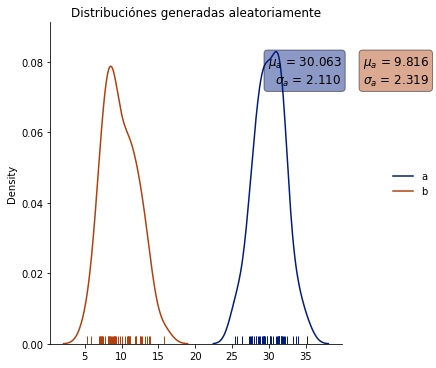

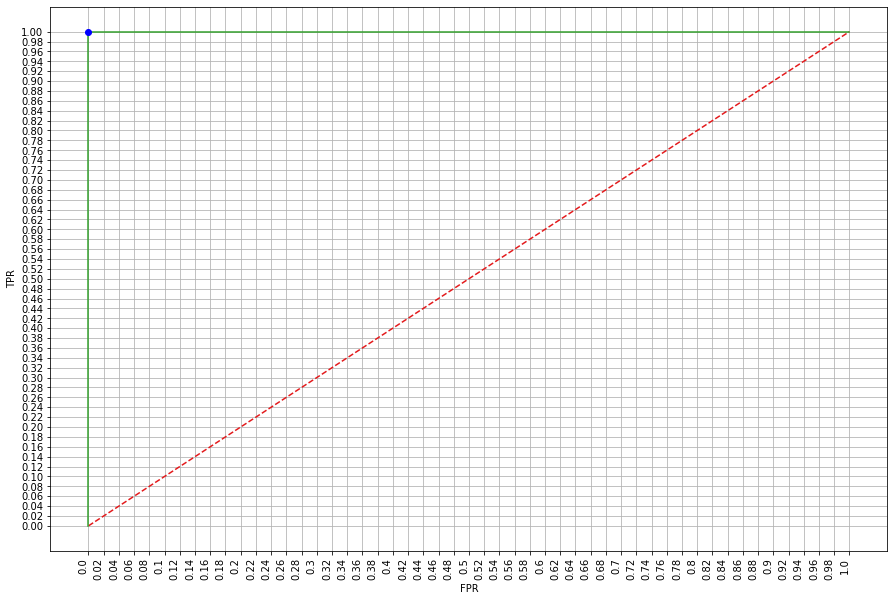

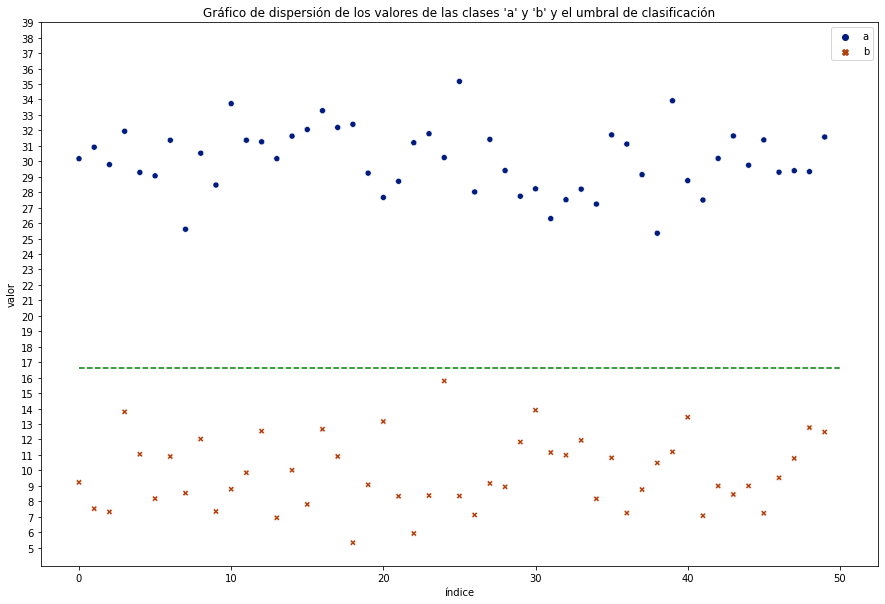

-----------------------------------------------------------------
TP: 50 	FP: 0 	TN: 50 	FN: 0
threshold: 16.616
accuracy: 1.0
precision: 1.0
sensitivity: 1.0
specificity: 1.0
f_measure: 1.0
indice Jaccard: 1.0
-----------------------------------------------------------------


In [129]:
df_split = pd.DataFrame(dict(a=generate_data_var(50, mean=30,std=2),
                       b=generate_data_var(50,mean=10,std=2)),
                  columns=['a', 'b'])
print_displot_dataset(df_split)
df_split_roc = get_df_roc(df_split)
x_roc,y_roc,min_point,threshold = get_points_roc(df_split_roc)
plot_roc(x_roc,y_roc,min_point)
plot_scatt_thresh(df_split,threshold,5,40)
df_split_roc["prediccion"] = pred_class(df_split_roc,threshold)
model_params = get_model_params(df_split_roc)
print_model_params(model_params)

Si las distribuciones de "a" y "b" son Gaussianas y están completamente solapadas, el clasificador se comporta como un clasificador aleatorio.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


<Figure size 432x288 with 0 Axes>

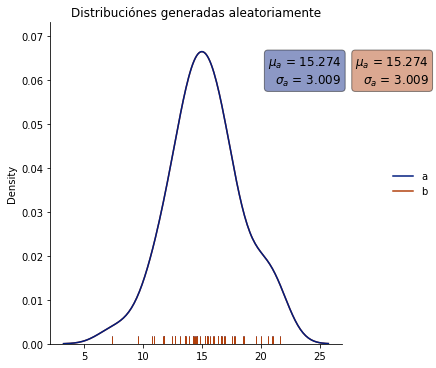

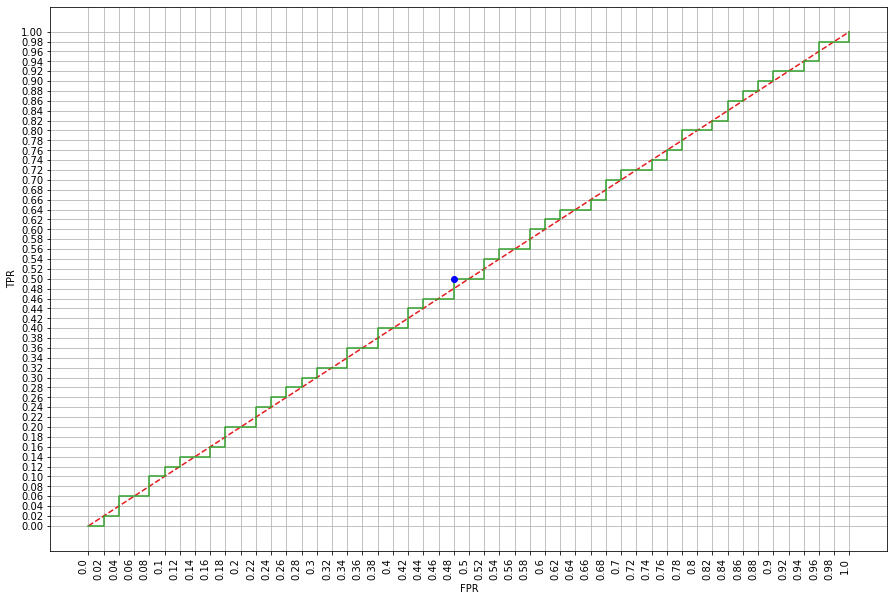

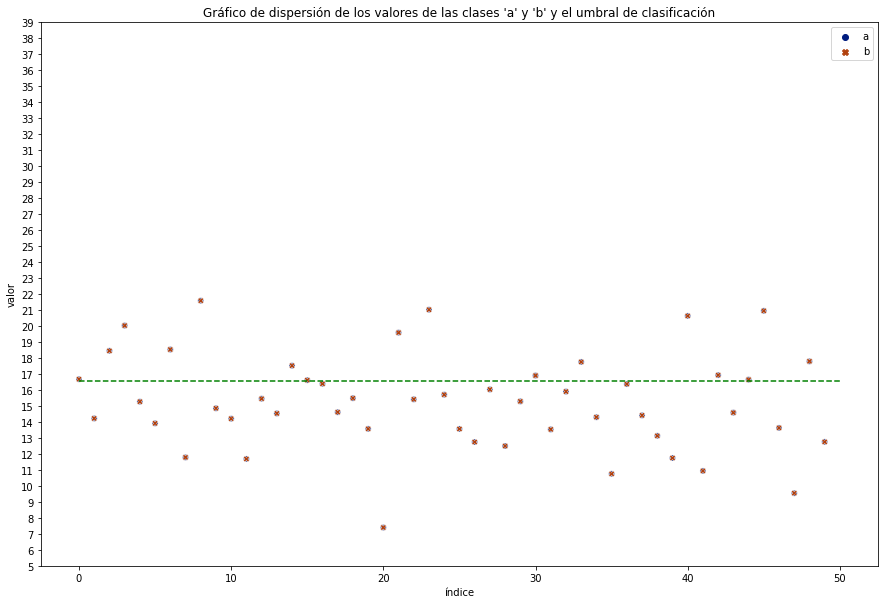

-----------------------------------------------------------------
TP: 16 	FP: 16 	TN: 34 	FN: 34
threshold: 16.567
accuracy: 0.5
precision: 0.5
sensitivity: 0.32
specificity: 0.68
f_measure: 0.39
indice Jaccard: 0.242
-----------------------------------------------------------------


In [135]:
dist=generate_data_var(50, mean=15,std=3)
df_split = pd.DataFrame(dict(a=dist,b=dist),columns=['a', 'b'])
print_displot_dataset(df_split)
df_split_roc = get_df_roc(df_split)
x_roc,y_roc,min_point,threshold = get_points_roc(df_split_roc)
plot_roc(x_roc,y_roc,min_point)
plot_scatt_thresh(df_split,threshold,5,40)
df_split_roc["prediccion"] = pred_class(df_split_roc,threshold)
model_params = get_model_params(df_split_roc)
print_model_params(model_params)

Para hacer no supervisado el proceso de obtener el umbral del clasificador se podría hacer una función donde se le pase el dataframe, cantidad de umbrales a probar(N), y el parámetro con el cuál se desee seleccionar al modelo(por ejemplo, indice de Jaccard, f_measure,etc). En primer instancia, esta obtiene el valor del punto de la curva ROC mas cercano al óptimo (0,1), luego, con este punto calcula el valor umbral.Partiendo del valor umbral, se construye una lista de N puntos, por ejemplo 10, con centro en el umbral calculado y paso de, siguiendo el ejemplo 0.2. Así, tendremos N/2 valores menores al umbral y N/2 valores mayores. Luego de esto, se computan las métricas del modelo para cada valor de umbral y se elige aquel que tenga la más óptima según el objetivo del clasificador, de este modo, la función retorna el valor umbral correspondiente.